### Importando bibliotecas 

In [17]:
import cvxpy as cp
import numpy as np
import mosek
import matplotlib.pyplot as plt


### Célula de debugging

In [16]:
def getCoeffs(beta):
    _linGamma = 1/2 - beta - (1-beta)/4
    _indGamma = beta + (1-beta)/4
    _linDelta = 1/2 - (1-beta)/4
    _indDelta = (1-beta)/4
    _linEpsilon = - (1-beta)/4
    _indEpsilon = (1-beta)/4
    _linPhi = - beta - (1-beta)/4
    _indPhi = beta + (1-beta)/4

    linearCoeffs = [_linGamma, _linGamma, _linGamma, _linPhi,
                    _linEpsilon, _linEpsilon, _linEpsilon, _linDelta,
                    _linEpsilon, _linEpsilon, _linEpsilon, _linDelta,
                    _linDelta, _linDelta, _linDelta, _linEpsilon]

    independentCoeffs = [_indGamma, _indGamma, _indGamma, _indPhi,
                        _indEpsilon, _indEpsilon, _indEpsilon, _indDelta,
                        _indEpsilon, _indEpsilon, _indEpsilon, _indDelta,
                        _indDelta, _indDelta, _indDelta, _indEpsilon]
    
    return linearCoeffs, independentCoeffs

constraints = []

alpha = cp.Variable(shape=1)
# constraints += [alpha >= 0, alpha <= 1]
constraints += [alpha <= 1]

# Computes values for the coefficients on the p(ab|xy) distribution given in the exercise
beta = 0.7
linearCoeffs, independentCoeffs = getCoeffs(beta)

p=[]
for i in range(16):
    p += [cp.Variable(shape=1, name="joint_"+format(i, '04b'))]
    constraints += [p[i] >= 0]


# Iterates through all of the total behavior components: p(a, b | x, y)
for i in range(16):
    # binary digits of i are abxy
    binaryIndex = format(i, '04b')
    aBehavior = binaryIndex[0]
    bBehavior = binaryIndex[1]
    x = int(binaryIndex[2])
    y = int(binaryIndex[3])

    marginalSum = []
    # Iterates through all of the joint distribution components: p(a0, a1, b0, b1)
    for j in range(16):
        aJoint = format(j, '04b')[0:2]
        bJoint = format(j, '04b')[2:]
        # when x is zero, take the 0th "a" component from the joint distribution, same for b and y
        if aJoint[x] == aBehavior and bJoint[y] == bBehavior:
            marginalSum += [p[j]]
    
    constraints += [linearCoeffs[i]*alpha + independentCoeffs[i] == cp.sum(marginalSum)]



# Probability distribution sums to one
constraints += [cp.sum(p) == 1]

objective = cp.Maximize(alpha)
problem = cp.Problem(objective=objective, constraints=constraints)
print(problem)

print("Starting optimization")
resultado = problem.solve(solver="MOSEK", verbose=True)
if(resultado != None):
    print(alpha.value)
    optimalPoint = alpha.value
    optimumDistribution = [p[i].value for i in range(16)]
    print("Optimum found at alpha = {}".format(optimalPoint))
    print("Joint distribution values: {}".format(optimumDistribution))
else:
    print("Infeasible or unbounded problem.")  



maximize var6217
subject to var6217 <= 1.0
           0.0 <= joint_0000
           0.0 <= joint_0001
           0.0 <= joint_0010
           0.0 <= joint_0011
           0.0 <= joint_0100
           0.0 <= joint_0101
           0.0 <= joint_0110
           0.0 <= joint_0111
           0.0 <= joint_1000
           0.0 <= joint_1001
           0.0 <= joint_1010
           0.0 <= joint_1011
           0.0 <= joint_1100
           0.0 <= joint_1101
           0.0 <= joint_1110
           0.0 <= joint_1111
           -0.27499999999999997 @ var6217 + 0.7749999999999999 == joint_0000 + joint_0001 + joint_0100 + joint_0101
           -0.27499999999999997 @ var6217 + 0.7749999999999999 == joint_0000 + joint_0010 + joint_0100 + joint_0110
           -0.27499999999999997 @ var6217 + 0.7749999999999999 == joint_0000 + joint_0001 + joint_1000 + joint_1001
           -0.7749999999999999 @ var6217 + 0.7749999999999999 == joint_0000 + joint_0010 + joint_1000 + joint_1010
           -0.0750000000000000

## Resolução do problema 5 usando teorema de Fine

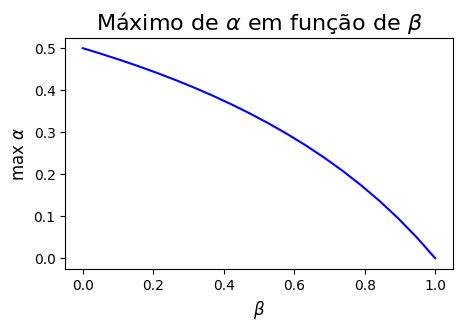

In [25]:
def getCoeffs(beta):
    _linGamma = 1/2 - beta - (1-beta)/4
    _indGamma = beta + (1-beta)/4
    _linDelta = 1/2 - (1-beta)/4
    _indDelta = (1-beta)/4
    _linEpsilon = - (1-beta)/4
    _indEpsilon = (1-beta)/4
    _linPhi = - beta - (1-beta)/4
    _indPhi = beta + (1-beta)/4

    linearCoeffs = [_linGamma, _linGamma, _linGamma, _linPhi,
                    _linEpsilon, _linEpsilon, _linEpsilon, _linDelta,
                    _linEpsilon, _linEpsilon, _linEpsilon, _linDelta,
                    _linDelta, _linDelta, _linDelta, _linEpsilon]

    independentCoeffs = [_indGamma, _indGamma, _indGamma, _indPhi,
                        _indEpsilon, _indEpsilon, _indEpsilon, _indDelta,
                        _indEpsilon, _indEpsilon, _indEpsilon, _indDelta,
                        _indDelta, _indDelta, _indDelta, _indEpsilon]
    
    return linearCoeffs, independentCoeffs

betas  = np.linspace(0, 1, 20)
alphas = []
for beta in betas:
    constraints = []

    alpha = cp.Variable(shape=1)
    # constraints += [alpha >= 0, alpha <= 1]
    constraints += [alpha <= 1]

    # Computes values for the coefficients on the p(ab|xy) distribution given in the exercise
    linearCoeffs, independentCoeffs = getCoeffs(beta)

    p=[]
    for i in range(16):
        p += [cp.Variable(shape=1, name="joint_"+format(i, '04b'))]
        constraints += [p[i] >= 0]


    # Iterates through all of the total behavior components: p(a, b | x, y)
    for i in range(16):
        # binary digits of i are abxy
        binaryIndex = format(i, '04b')
        aBehavior = binaryIndex[0]
        bBehavior = binaryIndex[1]
        x = int(binaryIndex[2])
        y = int(binaryIndex[3])

        marginalSum = []
        # Iterates through all of the joint distribution components: p(a0, a1, b0, b1)
        for j in range(16):
            aJoint = format(j, '04b')[0:2]
            bJoint = format(j, '04b')[2:]
            # when x is zero, take the 0th "a" component from the joint distribution, same for b and y
            if aJoint[x] == aBehavior and bJoint[y] == bBehavior:
                marginalSum += [p[j]]
        
        constraints += [linearCoeffs[i]*alpha + independentCoeffs[i] == cp.sum(marginalSum)]


    # Probability distribution sums to one
    constraints += [cp.sum(p) == 1]

    objective = cp.Maximize(alpha)
    problem = cp.Problem(objective=objective, constraints=constraints)

    resultado = problem.solve(solver="MOSEK", verbose=False)
    if(resultado != None):
        optimalPoint = alpha.value
        alphas += [optimalPoint]
        optimumDistribution = [p[i].value for i in range(16)]
        # print("Optimum found at alpha = {}".format(optimalPoint))
        # print("Joint distribution values: {}".format(optimumDistribution))
    else:
        print("Infeasible or unbounded problem.")  


plt.figure(figsize=(5, 3))
plt.plot(betas, alphas, color='blue')  

plt.title(r'Máximo de $\alpha$ em função de $\beta$', fontsize=16)  
plt.ylabel(r'max $\alpha$', fontsize=12)  
plt.xlabel(r'$\beta$', fontsize=12)  

plt.show()